In [1]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import Bio
from Bio.Seq import Seq

In [3]:
seq_A = Seq("tctttcgcttaggtataaacagcaggttacgcaaagggttgatctgggggtcccgagccaaacggtcctagcaactattaggcacccttgattcgcccgtatacgcatattaatctaaatgcttgaaagctgtaactcctccagtcggtctgattaatactcagtgagactgtccgacatccataactaagcgtggaagagcaccccagggaatccacgtctgtcatagtagccgaacctcctcactgtttaagaagtgcgagatctcgatagactcattttcttaaatgccagagacgcgtgaattagccgcgtcagcttgacgtcacaagttccgaacggcaccggaattaaatctggaacgtagggtttatgccgcttagcccaagtctgctccaggtatccgccgttcgcatttatttgaagtacctgttacaccgcgcaaaatacgagaacgttttctctggatccattgatttcgcgactgcaatcccattagtatgttcccaagagctgggtcaggatcctcctttgtcttgtaggtatcgtcgaacagttgcataagacactgaaatcttccgtcaaaagcatctgctgaggtcctcatcctattaaaaaggaacgttatagctgtaaggaattacacaatgaccccttgtattgggatatgggtcacattgctgttgcaacaaagccttgggcgggacgcccgagtttgctccgtttaacgcgcttttagaagagtgtcatcttacgccgggaatgatcagcaaatgttgttagcaattgatccgctagggaaagtaatgcaaccattggcaatacagcgagtggcaaatttcccattcgagcatgccgagattacacacccgttggccatttcacctcttgggaagacgcatcctatatgttcaggttaatttatagtactcgccagatcgcagttattacgacgtcccgatgggtgaagcattagtaccgagggtgtcgcgtatgttga")
seq_C = Seq("GCATGCATGCAT")

In [4]:
seq_A

Seq('tctttcgcttaggtataaacagcaggttacgcaaagggttgatctgggggtccc...tga')

In [5]:
# bagi yang ga bisa pakai biopython
# seq_B = "tctttcgcttaggtataaacagcaggttacgcaaagggttgatctgggggtcccgagccaaacggtcctagcaactattaggcacccttgattcgcccgtatacgcatattaatctaaatgcttgaaagctgtaactcctccagtcggtctgattaatactcagtgagactgtccgacatccataactaagcgtggaagagcaccccagggaatccacgtctgtcatagtagccgaacctcctcactgtttaagaagtgcgagatctcgatagactcattttcttaaatgccagagacgcgtgaattagccgcgtcagcttgacgtcacaagttccgaacggcaccggaattaaatctggaacgtagggtttatgccgcttagcccaagtctgctccaggtatccgccgttcgcatttatttgaagtacctgttacaccgcgcaaaatacgagaacgttttctctggatccattgatttcgcgactgcaatcccattagtatgttcccaagagctgggtcaggatcctcctttgtcttgtaggtatcgtcgaacagttgcataagacactgaaatcttccgtcaaaagcatctgctgaggtcctcatcctattaaaaaggaacgttatagctgtaaggaattacacaatgaccccttgtattgggatatgggtcacattgctgttgcaacaaagccttgggcgggacgcccgagtttgctccgtttaacgcgcttttagaagagtgtcatcttacgccgggaatgatcagcaaatgttgttagcaattgatccgctagggaaagtaatgcaaccattggcaatacagcgagtggcaaatttcccattcgagcatgccgagattacacacccgttggccatttcacctcttgggaagacgcatcctatatgttcaggttaatttatagtactcgccagatcgcagttattacgacgtcccgatgggtgaagcattagtaccgagggtgtcgcgtatgttga"

In [6]:
# begin function
def count_gc(seq: Seq):
  seq = seq.lower()

  # gc = [i for i in seq if i in "gc"]
  # the statement above is equivalent to:
  gc = []
  for i in seq:
    if(i in "gc"):
      gc.append(i)

  return len(gc)
# end of function

count_gc(seq_A)

472

In [7]:
count_gc(seq_C)

6

In [8]:
def count_at(seq: Seq):
  seq = seq.lower()
  at = [i for i in seq if i in "at"]
  return len(at)

In [9]:
count_at(seq_A)

528

In [10]:
count_at(seq_C)

6

In [11]:
len(seq_A)

1000

In [12]:
len(seq_C)

12

In [13]:
import matplotlib.pyplot as plt

In [14]:
plt.bar(
    height=[count_gc(seq_A), count_at(seq_A)], 
    x=["GC", "AT"]
)
plt.show()

In [15]:
gc_percentage = round(
    count_gc(seq_A) / len(seq_A) * 100,
    1
)

at_percentage = round(
    count_at(seq_A) / len(seq_A) * 100,
    1
) 

In [16]:
gc_percentage

47.2

In [17]:
at_percentage

52.8

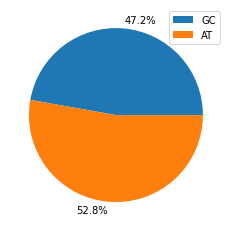

In [18]:
plt.pie(
    x=[gc_percentage, at_percentage],

    # f"" = string formatting
    # string = str(gc_percentage) + "%"
    # string2 = "{}%".format(gc_percentage)
    # string3 = f"{count_gc}%"

    labels=[
        f"{gc_percentage}%",
        f"{at_percentage}%"
    ]
)

plt.legend(["GC", "AT"])
plt.show()

In [19]:
string2 = "{}%".format(gc_percentage)
string2

'47.2%'

In [20]:
from Bio.SeqUtils import MeltingTemp as mt

In [21]:
# Tm_Wallace seharusnya beda rumus untuk DNA yang panjangnya < 14 dan 14<=
# tapi di Biopython digunakan rumus <14 untuk semua DNA
wallace_dna_a = mt.Tm_Wallace(seq_A)
wallace_dna_c = mt.Tm_Wallace(seq_C)

In [22]:
print(wallace_dna_a)
print(wallace_dna_c)

2944.0
36.0


In [23]:
def wallace_manual(seq: Seq):
  # Tm = (wA + xT) * 2 + (yG + zG) * 4
  # Rumus < 14
  at = count_at(seq)
  gc = count_gc(seq)

  if(len(seq) < 14):
    return at*2 + gc*4
  else:
    # Tm= 64.9 +41*(yG+zC-16.4)/(wA+xT+yG+zC)
    return 64.9 + 41 * (gc - 16.4) / (len(seq))

In [24]:
print(wallace_manual(seq_A))
print(wallace_manual(seq_C))

83.5796
36


In [25]:
gc_dna_a = mt.Tm_GC(seq_A)
gc_dna_c = mt.Tm_GC(seq_C)

In [26]:
print(gc_dna_a)
print(gc_dna_c)

78.65490207197792
30.40290207197791


In [27]:
nn_dna_a = mt.Tm_NN(seq_A)
print(nn_dna_a)

81.27024667336849


In [28]:
from Bio.SeqUtils import molecular_weight

In [29]:
weight_dna_a = molecular_weight(seq_A)
print(weight_dna_a)

308794.90780000115


In [30]:
rna_a = seq_A.transcribe()

# molecular weight RNA tidak bisa dihitung menggunakan molecular_weight() secara langsung, harus didefinisikan dulu tipenya
weight_rna_a = molecular_weight(rna_a, seq_type="RNA")
print(weight_rna_a)

321035.17900000134


In [31]:
def count_each(seq: Seq, t = 'g'):
  seq = seq.lower()
  t = t.lower()
  g = [i for i in seq if i == t]

  # ubah g dari array menjadi string
  g = "".join(g)
  return molecular_weight(g)

In [32]:
weight_g_seqA = count_each(seq_A, 'g')
weight_c_seqA = count_each(seq_A, 'c')
weight_a_seqA = count_each(seq_A, 'a')
weight_t_seqA = count_each(seq_A, 't')

sum = weight_g_seqA + weight_c_seqA + weight_a_seqA + weight_t_seqA
print(sum)

# kalau dijumlahkan semuanya, total = weight dna + constant

308848.9536999995
